In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

import os
import re
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [20]:
def embed(texts):
  return model(texts)

In [21]:
embed(["This movie is great"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 7.94610940e-03,  3.30545977e-02, -2.29651369e-02,
         4.50561382e-02, -8.72965809e-03,  3.20385247e-02,
        -1.94598138e-02, -3.05705722e-02,  4.84643355e-02,
        -1.05459169e-02,  3.46410833e-02, -6.16221167e-02,
        -5.19855618e-02,  5.31418109e-03,  1.13864643e-02,
        -4.96007279e-02,  3.86084139e-04,  2.90081277e-02,
         4.12855623e-03, -1.11746425e-02,  4.42689657e-02,
        -1.01134054e-01,  1.29977660e-03,  1.87560834e-03,
         2.65676435e-02, -4.03785184e-02, -5.11428304e-02,
        -7.04469085e-02, -6.49420023e-02,  1.01214588e-01,
         3.18647064e-02,  1.60226058e-02, -3.99507545e-02,
        -2.78127026e-02,  9.12948139e-03,  2.93685663e-02,
        -3.50017776e-03, -2.38222908e-02,  2.04407107e-02,
        -5.22431917e-02,  6.34323061e-02,  2.74915411e-03,
        -1.00811742e-01,  2.51938626e-02, -1.78050641e-02,
         2.26463713e-02,  2.37462539e-02,  4.80968244e-02,
      

In [ ]:
df = pd.read_csv("./dataset/Top_10000_Movies_IMDb.csv",engine="python")
df.head(2)

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/


In [27]:
df = df[['Movie Name','Plot']][:5500]
df.head(4)

,Movie Name,Plot
0,The Shawshank Redemption,"Over the course of several years, two convicts..."
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama,An anime adaptation of the Hindu epic the Rama...
3,The Chaos Class,"Lazy, uneducated students share a very close b..."


In [28]:
df.isnull().sum()

,0
Movie Name,0
Plot,0


In [29]:
titles = list(df['Plot'])
titles[:3]

['Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
 'An anime adaptation of the Hindu epic the Ramayana, where Lord Ram combats the wicked king Ravana.']

In [30]:
embeddings = embed(titles)
embeddings.shape

TensorShape([5500, 512])

In [31]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

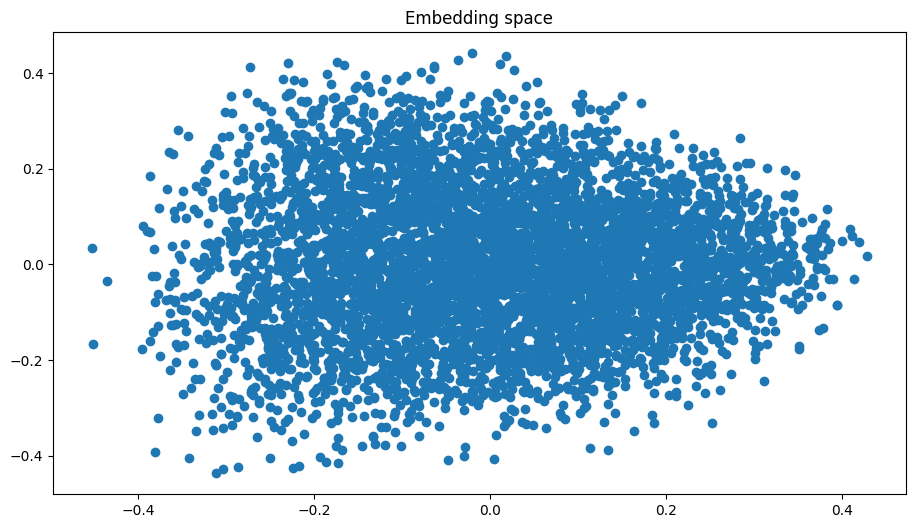

In [35]:
plt.figure(figsize=(11,6))
plt.title("Embedding space")
plt.scatter(emb_2d[:,0],emb_2d[:,1])
plt.show()

In [36]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [39]:
def recommend(text):
  emb = embed([text])
  neighbors = nn.kneighbors(emb,return_distance=False)[0]
  return df['Movie Name'].iloc[neighbors].tolist()

In [53]:
recommend('fantasy advanture')


['Black Mirror: Bandersnatch',
 'The NeverEnding Story',
 'Rocketman',
 'Lucia',
 '8½',
 'Fellini Satyricon',
 'The Green Knight',
 'Mirrormask',
 'Dead of Night',
 'Ruby Sparks']